In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.somlib as som
%matplotlib inline

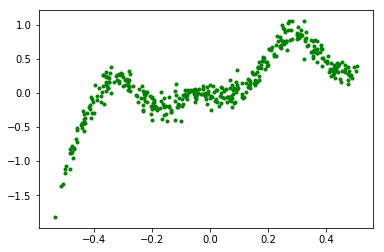

In [2]:
x = np.linspace(0,1,400)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - x.mean() # good practice to zero-center x in linear mapping
sortindx = np.argsort(x)
x = x[sortindx]
y = y[sortindx]
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
xy = np.c_[xx,yy]
plt.scatter(x, y, marker='.', color='g')

In [3]:
mysom = som.SOM2D(2, (4,4), learning_rate=1)

In [4]:
EPOCHS = 10
for epoch in range(EPOCHS):
    print('EPOCHS', epoch)
    sample_indx = np.random.permutation(len(xy))
    for indx in sample_indx:
        mysom._calculate_vector_distance_(xy[indx])
        mysom._calculate_neighbourhood_influence_()
        mysom._calculate_gradients_()
        mysom._update_()
    mysom._decay_()

EPOCHS 0
EPOCHS 1
EPOCHS 2
EPOCHS 3
EPOCHS 4
EPOCHS 5
EPOCHS 6
EPOCHS 7
EPOCHS 8
EPOCHS 9


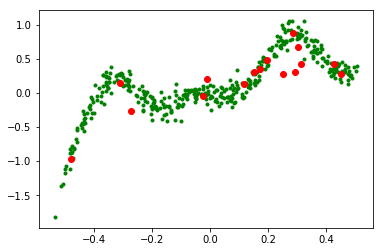

In [5]:
plt.scatter(x, y, marker='.', color='g')
plt.scatter(mysom.weights[0], mysom.weights[1], color='r')

## Continuous Visualization

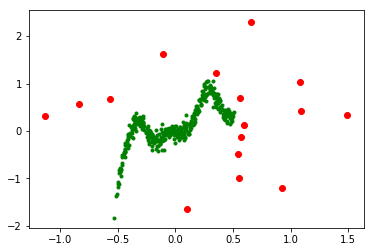

In [6]:
mysom = som.SOM2D(2, (4,4), learning_rate=1, sigma=0.5, decay_rate=0.9999999)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(mysom.weights[0], mysom.weights[1], color='r')

EPOCHS 0
lr=1, sigma=0.5
EPOCHS 1
lr=0.5000000250000012, sigma=0.2500000125000006
EPOCHS 2
lr=0.16666668611111277, sigma=0.08333334305555638
EPOCHS 3
lr=0.04166667465277879, sigma=0.020833337326389395
EPOCHS 4
lr=0.008333335597222605, sigma=0.004166667798611303


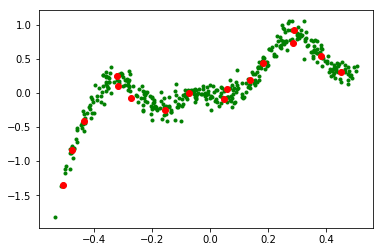

In [7]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

EPOCHS = 5
for epoch in range(EPOCHS):
    print('EPOCHS', epoch)
    print(f'lr={mysom.learning_rate}, sigma={mysom.sigma}')
    sample_indx = np.random.permutation(len(xy))
    for i, indx in enumerate(sample_indx):
        mysom._calculate_vector_distance_(xy[indx])
        mysom._calculate_neighbourhood_influence_()
        mysom._calculate_gradients_()
        mysom._update_()
        
        if i%20 ==0:
            ax.clear()
            plt.scatter(x, y, marker='.', color='g')
            plt.scatter(mysom.weights[0], mysom.weights[1], color='r')
            fig.canvas.draw()
            plt.pause(0.001)
        
    mysom._decay_()

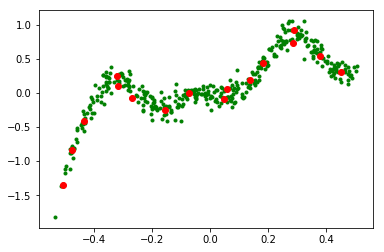

In [8]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(mysom.weights[0], mysom.weights[1], color='r')